Builder Agent Mermaid Diagram:
%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	analyze_request(analyze_request)
	generate_agent_json(generate_agent_json)
	validate_json(validate_json)
	repair_json(repair_json)
	save_json(save_json)
	compile_code(compile_code)
	__end__([<p>__end__</p>]):::last
	__start__ --> analyze_request;
	analyze_request --> generate_agent_json;
	compile_code --> __end__;
	generate_agent_json --> validate_json;
	repair_json --> validate_json;
	save_json --> compile_code;
	validate_json -. &nbsp;repair&nbsp; .-> repair_json;
	validate_json -. &nbsp;valid&nbsp; .-> save_json;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



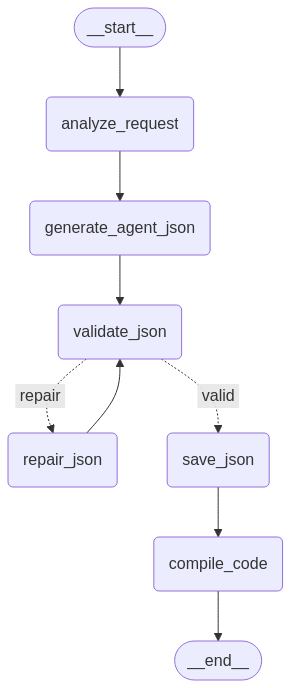


Builder Agent Graphviz Visualization:
To use graphviz visualization, install pygraphviz: pip install pygraphviz


In [1]:
# Visualize the builder agent
from builder_agent import create_builder_graph
from IPython.display import display, Image
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Load environment variables from .env file
from dotenv import load_dotenv
import os

# Load the .env file to set environment variables like OPENAI_API_KEY
load_dotenv()

# Verify that the API key is loaded
if not os.getenv("OPENAI_API_KEY"):
    print("Warning: OPENAI_API_KEY environment variable is not set.")
    print("Please create a .env file with your OpenAI API key or set it manually.")

# Create a builder agent instance
builder = create_builder_graph()

# Display the Mermaid diagram as text
print("Builder Agent Mermaid Diagram:")
print(builder.get_graph().draw_mermaid())

# Display the Mermaid diagram as PNG using the Mermaid.Ink API
display(
    Image(
        builder.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
            wrap_label_n_words=9,
        )
    )
)

# Try to use graphviz if available
try:
    print("\nBuilder Agent Graphviz Visualization:")
    display(Image(builder.get_graph().draw_png()))
except ImportError:
    print(
        "To use graphviz visualization, install pygraphviz: pip install pygraphviz"
    )


In [8]:
# Use the builder agent to create a new agent from a natural language request

# Define the request for a web research agent
request = """
Create a document processing agent that automatically extracts, classifies, and routes information from legal contracts. The agent should:

1. Parse PDF/DOCX contract documents using OCR if needed
2. Extract key information like parties involved, effective dates, payment terms, and obligations
3. Classify the contract type (NDA, employment, vendor agreement, etc.)
4. Identify high-risk clauses through conditional logic:
   - Flag non-standard indemnification clauses
   - Detect missing termination conditions
   - Identify unusual liability limitations
   - Check for compliance with company policies
5. Use a loop to compare extracted terms against a database of standard terms
6. Generate a risk assessment score based on weighted conditions
7. Route the contract to appropriate departments based on risk level:
   - Low risk → Automatic approval
   - Medium risk → Legal review
   - High risk → Executive approval

The agent should maintain an audit trail of all decisions and implement a feedback loop to improve classification accuracy over time.


"""

# Set up the initial state for the builder
initial_state = {
    "request": request,
    "output_dir": "./generated_agents",
    "model_name": "o3-mini"  # You can change this to another model if needed
}

# Run the builder agent
result = builder.invoke(initial_state)

# Display the results
print("\nBuilder Agent Results:")
print(f"Agent JSON Path: {result.get('json_path', 'Not generated')}")
print(f"Agent Python Path: {result.get('py_path', 'Not generated')}")

# If the agent was successfully created, we can load and test it
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    print("\nAgent was successfully created!")
    
    # You could import and test the agent here
    # For example:
    # import importlib.util
    # import sys
    # 
    # # Extract the module name from the path
    # module_name = os.path.basename(result['py_path']).replace('.py', '')
    # spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    # module = importlib.util.module_from_spec(spec)
    # sys.modules[module_name] = module
    # spec.loader.exec_module(module)
    # 
    # # Get the agent from the module
    # agent = module.create_agent()
    # 
    # # Test the agent
    # test_result = agent.invoke({"input": "What is the latest news about AI?"})
    # print(test_result)
else:
    print("\nAgent creation failed or the file doesn't exist.")
    if result.get('error'):
        print(f"Error: {result['error']}")


Analyzing request...
Generating agent JSON definition...
Validating agent JSON...
Validation failed
Syntax error in condition node 'risk_condition': invalid syntax (<unknown>, line 2)
Attempting to repair agent JSON...
Validating agent JSON...
Validation failed
Syntax error in condition node 'risk_condition': invalid syntax (<unknown>, line 3)
Initial repair attempt failed. Attempting deeper repair...
JSON repair successful.
Validating agent JSON...
Validation passed
Agent JSON saved to: ./generated_agents/legalcontractprocessingagent.json
Compiling agent to Python code...
LangGraph code generated and saved to ./generated_agents/legalcontractprocessingagent.py
Agent Python code saved to: ./generated_agents/legalcontractprocessingagent.py

Builder Agent Results:
Agent JSON Path: ./generated_agents/legalcontractprocessingagent.json
Agent Python Path: ./generated_agents/legalcontractprocessingagent.py

Agent was successfully created!


Generated Agent Mermaid Diagram:
%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	parse_document(parse_document)
	extract_information(extract_information)
	classify_contract(classify_contract)
	assess_risk(assess_risk)
	risk_condition(risk_condition)
	route_low(route_low)
	route_medium(route_medium)
	route_high(route_high)
	audit_log(audit_log)
	__end__([<p>__end__</p>]):::last
	__start__ --> parse_document;
	assess_risk --> risk_condition;
	audit_log --> __end__;
	classify_contract --> assess_risk;
	extract_information --> classify_contract;
	parse_document --> extract_information;
	route_high --> audit_log;
	route_low --> audit_log;
	route_medium --> audit_log;
	risk_condition -. &nbsp;low&nbsp; .-> route_low;
	risk_condition -. &nbsp;medium&nbsp; .-> route_medium;
	risk_condition -. &nbsp;high&nbsp; .-> route_high;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



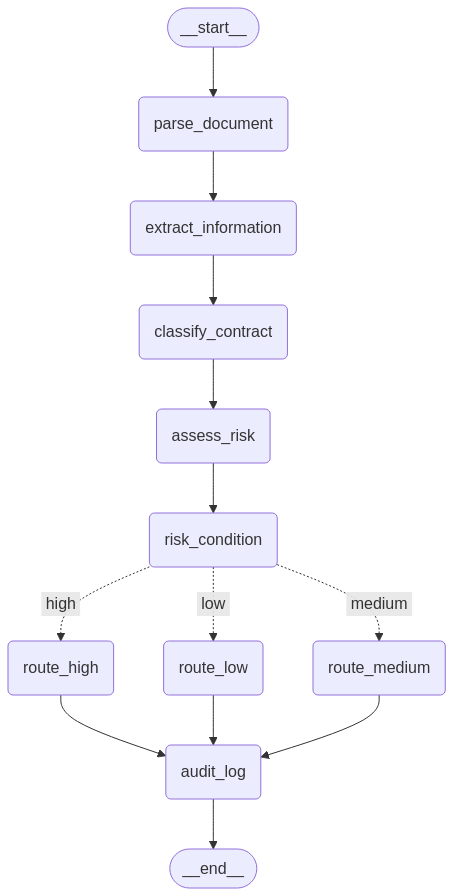


Agent loaded and visualized successfully!


In [10]:
# Load and visualize the generated agent
import importlib.util
import sys
from IPython.display import Image
import os
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Extract the module name from the path
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    # Get the module name from the path
    module_name = os.path.basename(result['py_path']).replace('.py', '')
    
    # Import the module dynamically
    spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    # Create the agent
    agent = module.create_agent_graph()
    
    # Visualize the agent graph using Mermaid
    try:
        # Display the Mermaid diagram as text
        print("Generated Agent Mermaid Diagram:")
        print(agent.get_graph().draw_mermaid())
        
        # Display the Mermaid diagram as PNG using the Mermaid.Ink API
        display(
            Image(
                agent.get_graph().draw_mermaid_png(
                    draw_method=MermaidDrawMethod.API,
                    curve_style=CurveStyle.LINEAR,
                    node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
                    wrap_label_n_words=9,
                )
            )
        )
        
        print("\nAgent loaded and visualized successfully!")
    except Exception as e:
        print(f"Error visualizing agent: {str(e)}")
else:
    print("Cannot visualize agent: Python file not found")
